<a href="https://colab.research.google.com/github/jihun5/jupyter_home/blob/main/1_8_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EB%AA%85%EB%A7%9D_%EC%A0%84%EC%B2%B4%EC%BD%94%EB%93%9C_%EB%B0%8F_%EC%9A%A9%EC%96%B4%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

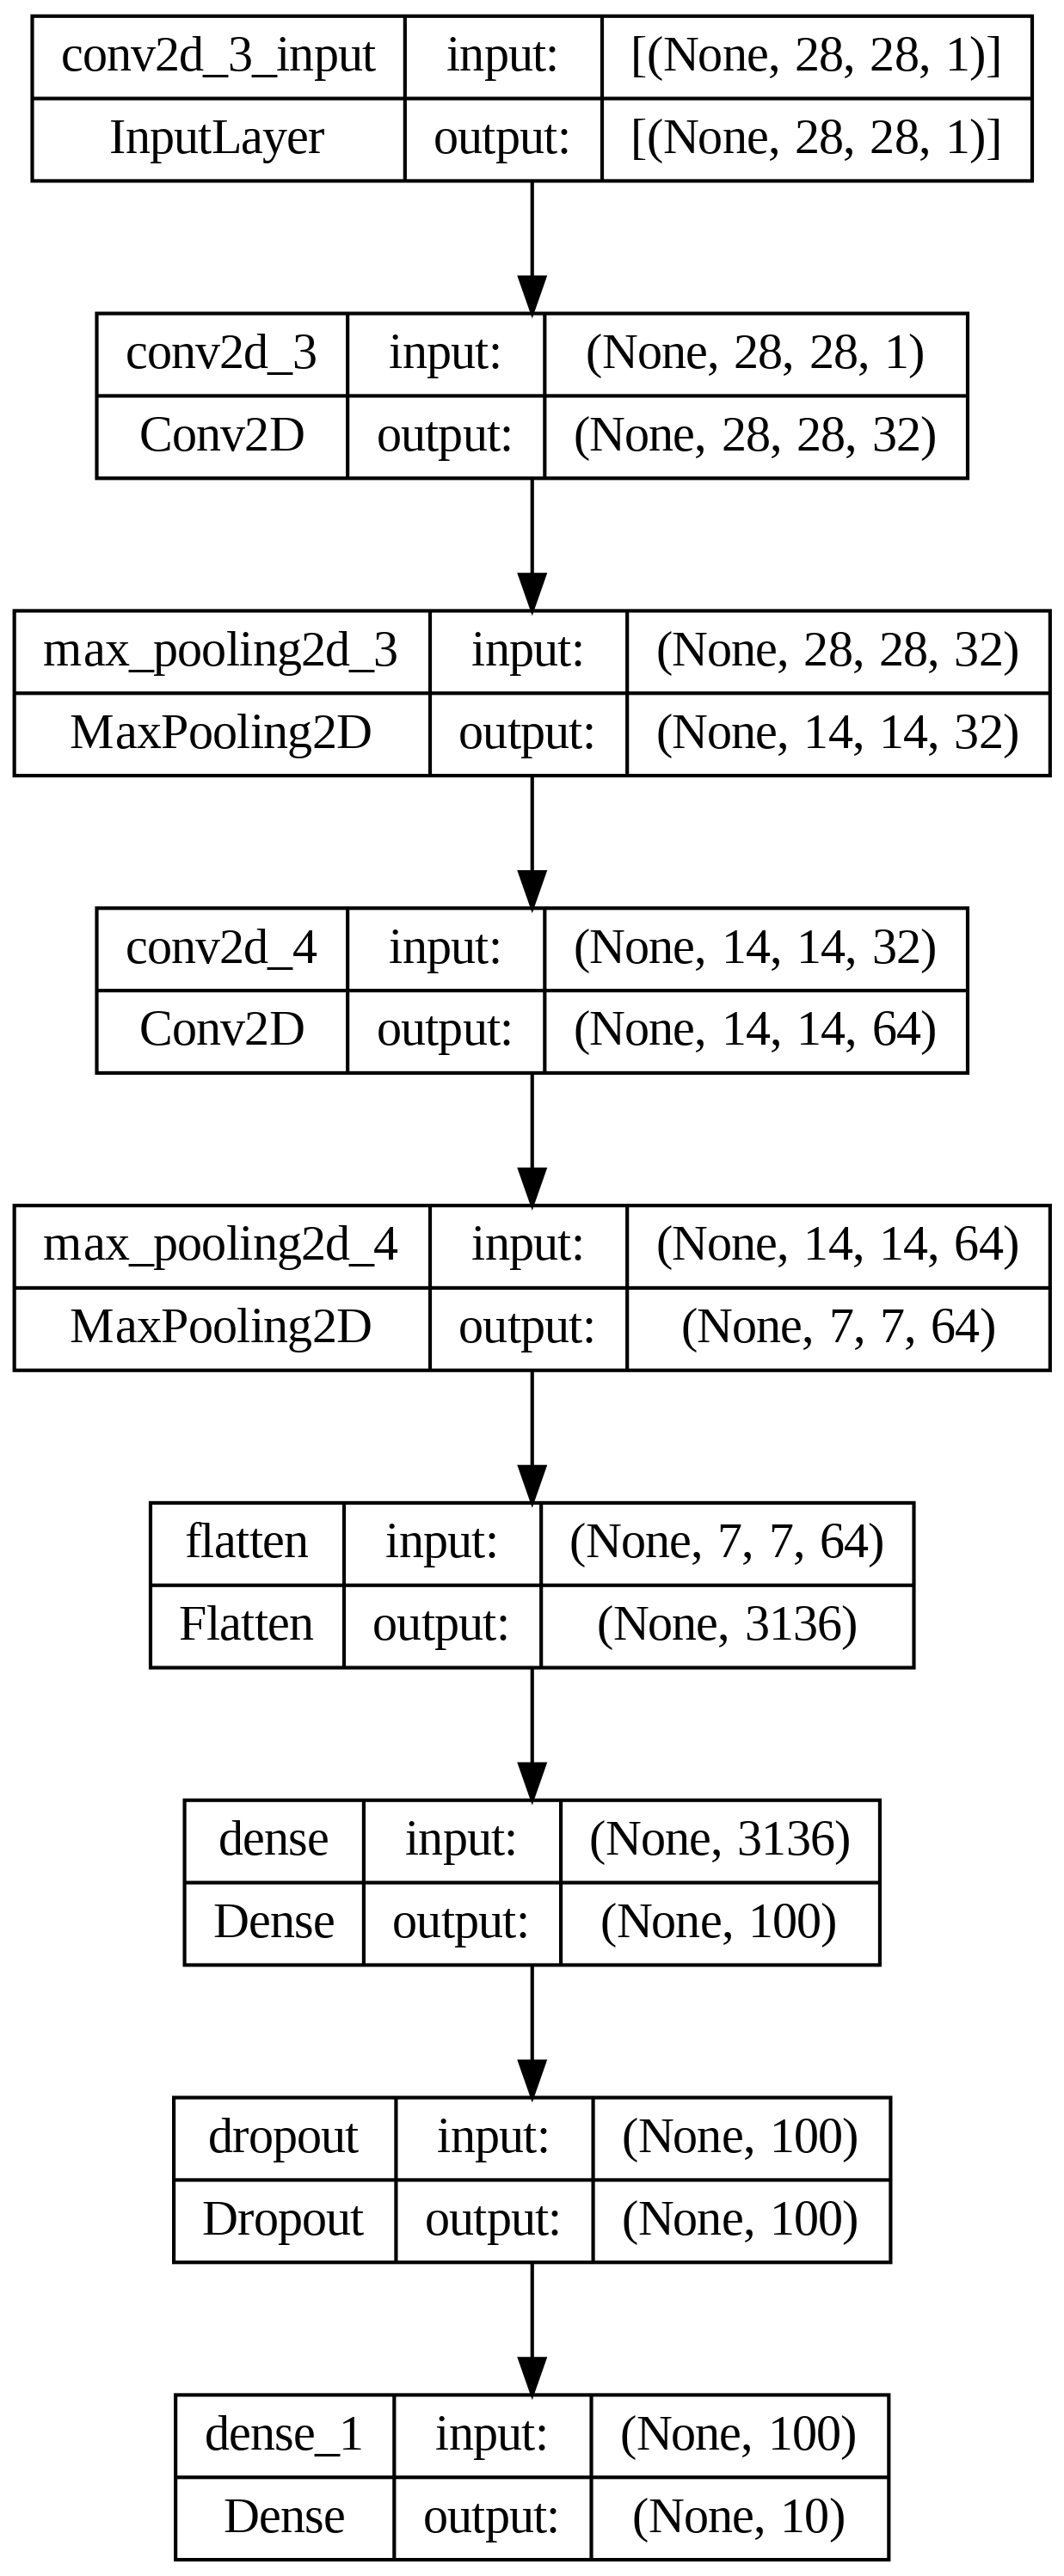

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()
keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

Epoch 1/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2182 - accuracy: 0.9341 - val_loss: 0.0631 - val_accuracy: 0.9803
Epoch 2/20
   3/1500 [..............................] - ETA: 49s - loss: 0.1295 - accuracy: 0.9583

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 63s 42ms/step - loss: 0.0845 - accuracy: 0.9743 - val_loss: 0.0407 - val_accuracy: 0.9877
Epoch 3/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0597 - accuracy: 0.9814 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0385 - val_accuracy: 0.9882
Epoch 5/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0331 - val_accuracy: 0.9906
Epoch 6/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.0323 - accuracy: 0.9896 - val_loss: 0.0332 - val_accuracy: 0.9902
Epoch 7/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0340 - val_accuracy: 0.9909


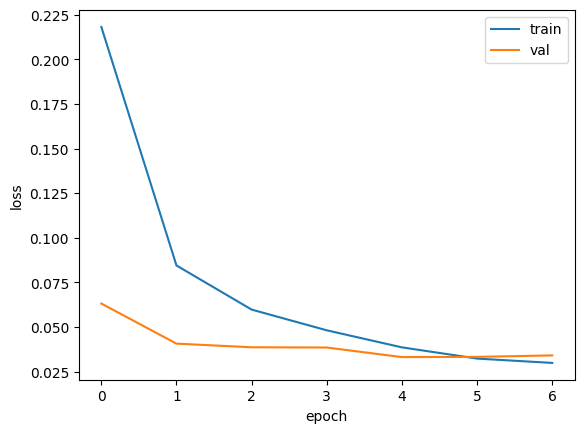

375/375 [==============================] - 5s 14ms/step - loss: 0.0331 - accuracy: 0.9906


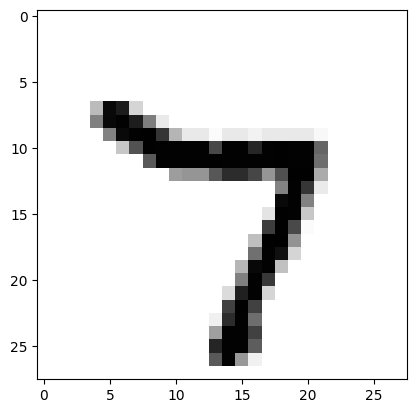

1/1 [==============================] - 0s 111ms/step
[[3.1546120e-21 2.1892812e-11 2.3360694e-13 5.6681280e-16 5.0049145e-11
  4.9283333e-12 1.5788095e-18 1.0000000e+00 3.9844509e-17 1.8489616e-11]]


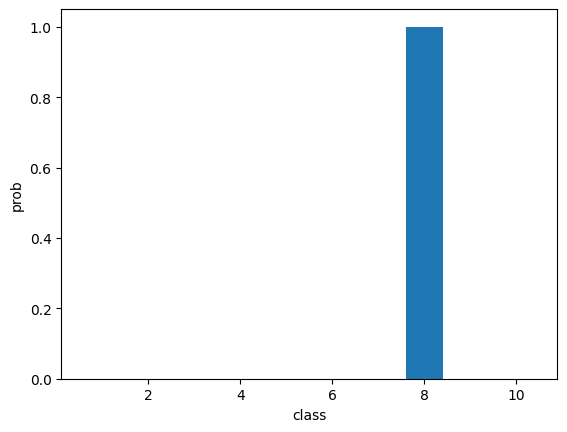

스니커즈
313/313 [==============================] - 4s 11ms/step - loss: 0.0266 - accuracy: 0.9911


[0.026598269119858742, 0.991100013256073]

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

model.evaluate(val_scaled, val_target)
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)

plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달','셔츠', '스니커즈', '가방', '앵클부츠']

import numpy as np
print(classes[np.argmax(preds)])

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)